In [20]:
# 1. Import libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
import matplotlib.pyplot as plt

In [21]:
# 2. Load dataset (make sure the CSV has a 'products' column with lists of items)
df = pd.read_csv(r"D:\JOB\1 Pricing analyst\2 Revenue and profit optimization model\3  Bundle Pricing Optimization\market_basket_analysis_dataset.csv")  # Replace with your actual file path

In [22]:
df

,transaction_id,products,total_price,discount,effective_price
0,1,"['Backpack', 'Mouse', 'Smartphone', 'Charger']",815,0,815.00
1,2,"['USB Drive', 'Laptop']",1020,20,816.00
2,3,"['Monitor', 'Backpack', 'Headphones', 'Smartph...",1140,10,1026.00
3,4,"['Mouse', 'Laptop']",1030,5,978.50
4,5,"['Mouse', 'Tablet', 'Backpack']",490,0,490.00
...,...,...,...,...,...
9995,9996,"['USB Drive', 'Smartphone', 'Mouse']",750,15,637.50
9996,9997,"['Monitor', 'Laptop', 'Charger', 'Backpack']",1385,15,1177.25
9997,9998,"['Monitor', 'Smartphone', 'Charger', 'Keyboard...",1475,15,1253.75
9998,9999,"['Keyboard', 'USB Drive']",70,0,70.00


In [26]:
# 3. Convert string list to actual Python list (if needed)
import ast

df["products"] = df["products"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [27]:
# 4. Transform to one-hot encoded format
te = TransactionEncoder()
te_array = te.fit(df["products"]).transform(df["products"])
basket_df = pd.DataFrame(te_array, columns=te.columns_)

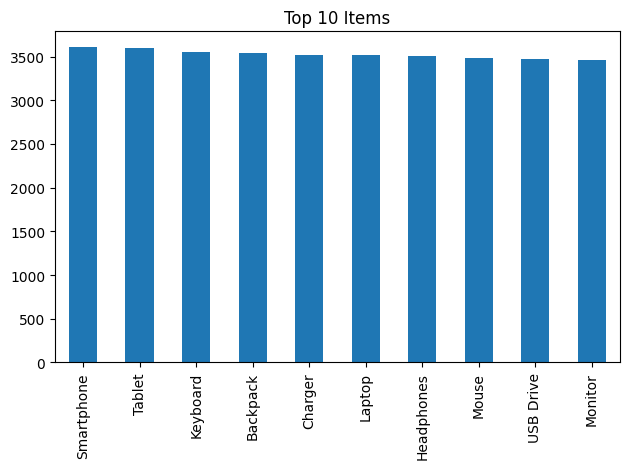

In [28]:
# 5. Run Apriori
item_counts = basket_df.sum().sort_values(ascending=False)
item_counts.head(10).plot(kind='bar', title="Top 10 Items")
plt.tight_layout()
plt.show()

In [29]:
frequent_apriori = apriori(basket_df, min_support=0.01, use_colnames=True)
rules_apriori = association_rules(frequent_apriori, metric="confidence", min_threshold=0.3)

In [30]:
frequent_fpgrowth = fpgrowth(basket_df, min_support=0.01, use_colnames=True)
rules_fpgrowth = association_rules(frequent_fpgrowth, metric="confidence", min_threshold=0.3)

In [31]:
# 7. Print results
print("Apriori Rules:")
print(rules_apriori[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

print("\nFP-Growth Rules:")
print(rules_fpgrowth[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Apriori Rules:
            antecedents   consequents  support  confidence      lift
0            (Backpack)     (Charger)   0.1124    0.317514  0.902285
1             (Charger)    (Backpack)   0.1124    0.319409  0.902285
2            (Backpack)  (Headphones)   0.1095    0.309322  0.881008
3          (Headphones)    (Backpack)   0.1095    0.311877  0.881008
4            (Backpack)    (Keyboard)   0.1155    0.326271  0.919592
..                  ...           ...      ...         ...       ...
112   (Keyboard, Mouse)      (Laptop)   0.0343    0.309846  0.880996
113  (Keyboard, Laptop)       (Mouse)   0.0343    0.304078  0.872033
114  (Keyboard, Laptop)      (Tablet)   0.0345    0.305851  0.849115
115    (Tablet, Laptop)    (Keyboard)   0.0345    0.305851  0.862038
116    (Monitor, Mouse)      (Laptop)   0.0333    0.301904  0.858413

[117 rows x 5 columns]

FP-Growth Rules:
      antecedents   consequents  support  confidence      lift
0      (Backpack)  (Smartphone)   0.1177    0.332486

In [32]:
# If I'M NOT RECEIVING ANY SUGGESTION MEANS NO PRODUCT MET THE CRITERIA. 